In [2]:
! pip install pandas

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 660.6 kB/s eta 0:00:18
   ---------------------------------------- 0.0/11.6 MB 660.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 563.7 kB/s eta 0:00:21
   ---------------------------------------- 0.1/11.6 MB 774.0 kB/s eta 0:00:15
    --------------------------------------- 0.2/11.6 MB 657.6 kB/s eta 0:00:18
    --------------------------------------- 0.3/11.6 MB 927.4 kB/s eta 0:00:13
   - -------------------------------------- 0.3/11.6 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.5/11.6 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.7/11.6 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.9/11.6 MB 1.9 MB/s eta 0:00:06
   --- --------

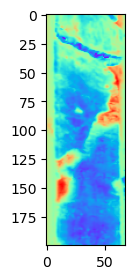

(13600, 268)


In [19]:
###Import data
with open(input_csv, 'r') as f:
     nx, ny, nz= [int(i) for i in f.readline().rstrip().split(',')]
     t=np.zeros((nx*ny*nz), np.float32)
     i=0
     for line in f: 
       t[i]=float(line)
       i += 1
     t=t.reshape((nx,ny,nz))
plt.figure(figsize=(3,3), dpi=100)
plt.imshow(t[:,:,170].reshape((nx,ny)),cmap='rainbow')
plt.show()
###Reshape array
SWIR= t.reshape((nx*ny,nz))
print(np.shape(SWIR))